```
             Credit Card Approval and Fraud Detection 
```

## [<u>Dataset location</u> ](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/)

##  This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.


 ##  Importing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset=pd.read_csv("Credit_Card_Applications.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## Feauture Extraction-Dimensionality Reduction
We are going to implement two diferrent methods one that is considered part of supervised learning(LDA) and one that is part of unsupervised learning(PCA,Kernel PCA).



## Prinicipal Component Analysis a.k.a PCA
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. 
![](http://www.nlpca.org/fig_pca_principal_component_analysis.png)
![](http://108.61.119.12/wp-content/uploads/2014/11/gaussDist-labeled.png)

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[ 0.28168271  0.18807168  0.16010723  0.10606817  0.06686085  0.05536152
  0.03552236  0.03072197  0.02417931  0.0191843   0.01542484  0.00681457
  0.00539645  0.00254396  0.00206008]


We can observe that if we choose only 2 PC our model won't be that good beacuse the ratio of the <b>cummulative expailned_variance</b> would be <b>47%</b> < <b>50 %</b> .Despite that fact we will continue with 2 components in the sake of the <b>visualization</b> of the results.

In [4]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [5]:
X_train

array([[-0.73008875,  0.21915149],
       [-0.57969177, -0.68986132],
       [ 0.04738995, -0.34624856],
       ..., 
       [-0.57470291, -0.69055004],
       [ 0.70270622,  0.45186564],
       [ 0.73288244,  0.44444904]])

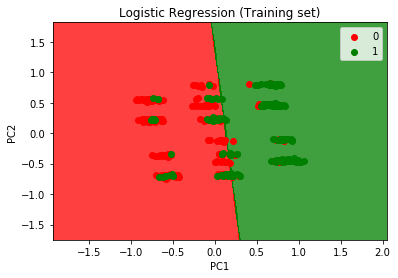

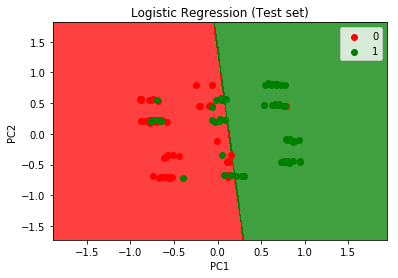

In [6]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)



In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

accuracies.std()


In [ ]:
accuracies.mean()

In [ ]:
accuracies.std()

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()



In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [7]:
print("Confusion matrix",cm)

Confusion matrix [[68  5]
 [18 47]]


In [8]:
print("Accuracy in test set :",(68+47)/(68+47+5+18)*100)

Accuracy in test set : 83.33333333333334


### An accuracy of 83 % in the test set considering that we reduce our model only to 2 input variables from 15 is a  sufficient result

## Linear Discriminant Analysis(LDA)

<strong>Linear discriminant analysis (LDA) is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.</strong>

![](https://i.ytimg.com/vi/6Ht-nIf_NKc/maxresdefault.jpg)

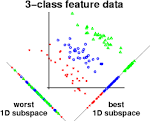

![](http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png)

![](http://www.bogotobogo.com/python/scikit-learn/images/CompressData-2-DimensionalityReduction-LDA/Reducing2Dto1D-Good-1.png)

###  <u>PCA vs LDA</u>
### PCA reduces dimensions by focusing on the data with the most variations. This is useful for the high dimensional data because PCA helps us to draw a simple XY plot.

### But we'll use LDA when we're interested maximizing the separability of the data so that we can make the best  decisions. In other words, though LDA (supervised) is similar to PCA (unsupervised), but LDA focuses on maximizing the separability among known categories.

## [<b>Useful link about LDA implementation</b>](http://goelhardik.github.io/2016/10/04/fishers-lda/)

In [9]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
# Applying LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)


In [ ]:
accuracies.mean()

In [ ]:
accuracies.std()

In [11]:
cm

array([[66, 16],
       [ 4, 52]])

In [12]:
print("Accuracy in the test set",(66+52)/(66+52+16+4)*100)

Accuracy in the test set 85.5072463768116


## Kernel PCA and the "Kernel Trick" Intuition

### In the field of multivariate statistics, kernel principal component analysis (kernel PCA) [1] is an extension of principal component analysis (PCA) using techniques of kernel methods. Using a kernel, the originally linear operations of PCA are performed in a reproducing kernel Hilbert space.The kernel trick avoids the explicit mapping that is needed to get linear learning algorithms to learn a nonlinear function or decision boundary. For all and in the input space , certain functions can be expressed as an inner product in another space . The function is often referred to as a kernel or a kernel function.

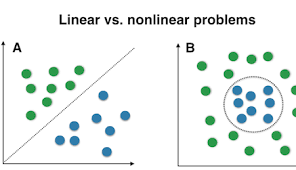

![](http://www.eric-kim.net/eric-kim-net/posts/1/imgs/data_2d_to_3d.png)

![](https://qph.ec.quoracdn.net/main-qimg-c7f5c6f1fc6d4be7daaaf82d975e226e)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Kernel_trick_idea.svg/1260px-Kernel_trick_idea.svg.png)

![](http://www.eric-kim.net/eric-kim-net/posts/1/imgs/data_2d_to_3d_hyperplane.png)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)


In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)


In [ ]:
accuracies.mean()

In [ ]:
accuracies.std()

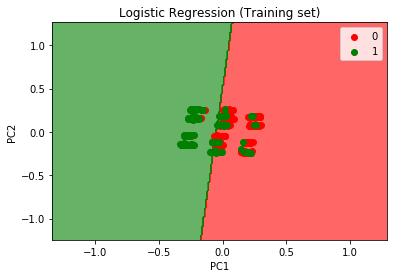

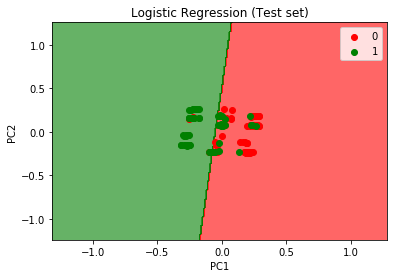

In [14]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()




In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [15]:
cm

array([[68,  5],
       [19, 46]])

In [16]:
print("Accuracy in the test:",(65+52)/(65+52+8+13))

Accuracy in the test: 0.8478260869565217


### [Link to different types of kernel functions](http://mlkernels.readthedocs.io/en/latest/kernels.html)

### [Useful blog about kernel PCA implementation in python](http://sebastianraschka.com/Articles/2014_kernel_pca.html)

 
# <strong> <u> Unsupervised Learning-Clustering</u> </strong>
 

## K-Means Clustering

#### k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.



#### K-Means Random Initialization Problem. See picture below!

![](https://datasciencelab.files.wordpress.com/2014/01/kpp_n200_k31.png)

#### In data mining, k-means++[1][2] is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm. It was proposed in 2007 by David Arthur and Sergei Vassilvitskii, as an approximation algorithm for the NP-hard k-means problem—a way of avoiding the sometimes poor clusterings found by the standard k-means algorithm.

### Improved initialization algorithm
#### The intuition behind this approach is that spreading out the k initial cluster centers is a good thing: the first cluster center is chosen uniformly at random from the data points that are being clustered, after which each subsequent cluster center is chosen from the remaining data points with probability proportional to its squared distance from the point's closest existing cluster center.

#### The exact algorithm is as follows:

#### 1.Choose one center uniformly at random from among the data points.
#### 2.For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen.
#### 3.Choose one new data point at random as a new center, using a weighted probability distribution where a point x is 4.chosen with probability proportional to D(x)2.
#### 5.Repeat Steps 2 and 3 until k centers have been chosen.
#### Now that the initial centers have been chosen, proceed using standard k-means clustering.


## [k-means++: The Advantages of Careful Seeding by David Arthur and Sergei Vassilvitskii,Standford Edu. Pub.](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

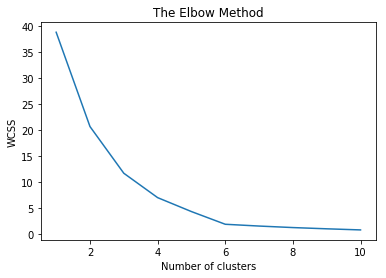

In [17]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')



In [ ]:
plt.show()

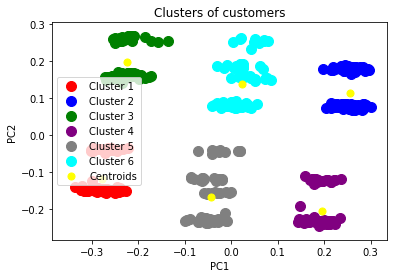

In [18]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

# Visualising the clusters
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train[y_kmeans == 3, 0], X_train[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(X_train[y_kmeans == 4, 0], X_train[y_kmeans == 4, 1], s = 100, c = 'grey', label = 'Cluster 5')
plt.scatter(X_train[y_kmeans == 5, 0], X_train[y_kmeans == 5, 1], s = 100, c = 'cyan', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()


In [ ]:
plt.show()

## Hierarchical Clustering

#### Agglomerative clustering: It’s also known as AGNES (Agglomerative Nesting). It works in a bottom-up manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root) (see figure below). The result is a tree which can be plotted as a dendrogram.

### A number of different cluster agglomeration methods (i.e, linkage methods) have been developed to answer to this question. The most common types methods are:

#### Maximum or complete linkage clustering: It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the largest value (i.e., maximum value) of these dissimilarities as the distance between the two clusters. It tends to produce more compact clusters.
##### Minimum or single linkage clustering: It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the smallest of these dissimilarities as a linkage criterion. It tends to produce long, “loose” clusters.
#### Mean or average linkage clustering: It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the average of these dissimilarities as the distance between the two clusters.
#### Centroid linkage clustering: It computes the dissimilarity between the centroid for cluster 1 (a mean vector of length p variables) and the centroid for cluster 2.
#### Ward’s minimum variance method: It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged.


![](http://uc-r.github.io/public/images/analytics/clustering/hierarchical/unnamed-chunk-2-1.png)

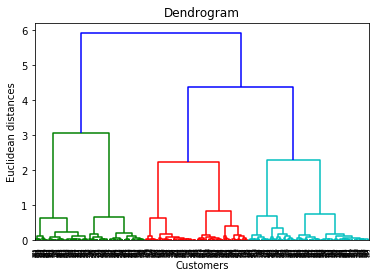

In [19]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')



In [ ]:
plt.show()

### <u>Finding the optimal number of clusters from the dendrogram</u>

#### Cutting the dendogram  where the maximum vertical distance exist and it is not interrupted from others horizontal ones if the latter ones were fully extended.

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/02/05113935/q15sol.png)

#### In our example the distance is in the red cluster(right branch) and  the result would be 6 clusters!

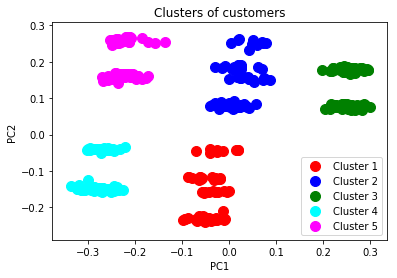

In [20]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_train)

# Visualising the clusters
plt.scatter(X_train[y_hc == 0, 0], X_train[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_hc == 1, 0], X_train[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_hc == 2, 0], X_train[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train[y_hc == 3, 0], X_train[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_train[y_hc == 4, 0], X_train[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()


In [ ]:
plt.show()

# Classification

## Overfitting Problem in Machine Learning

![](https://image.slidesharecdn.com/statisticalclassification-areviewonsometechniques-121010063343-phpapp02/95/statistical-classification-a-review-on-some-techniques-24-728.jpg?cb=1349852217)

![](https://cdn-images-1.medium.com/max/1600/1*tBErXYVvTw2jSUYK7thU2A.png)

#### Overfitting refers to a model that models the training data too well.

#### Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

#### Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.



# Model Selection and Parameter Tuning

![](https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg)

## K-fold cross-validation

## In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data.

![](https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png)

![](https://cdn-images-1.medium.com/max/1600/1*J2B_bcbd1-s1kpWOu_FZrg.png)

![](http://image.slidesharecdn.com/l1penalizationupload-121002034100-phpapp01/95/classification-using-l1penalized-logistic-regression-7-728.jpg?cb=1349149631)

## Parameter Tuning

### In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.

### The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data

## Grid Search

### The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set[3] or evaluation on a held-out validation set.

![](http://beta.cambridgespark.com/courses/jpm/figures/mod4_hp.png)

![](https://image.slidesharecdn.com/ddrlspring2017-visualizingmodelselectionwithscikit-yellowbrick-170324200737/95/visualizing-model-selection-with-scikityellowbrick-an-introduction-to-developing-visualizers-11-638.jpg?cb=1490386312)

## K-NN Classification

### In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

    In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
    In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.


![](https://image.slidesharecdn.com/knn-160904075605/95/k-nearest-neighbors-12-638.jpg?cb=1472975797)

![](https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg)

In [21]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)


In [ ]:
accuracies.mean()

In [ ]:
accuracies.std()

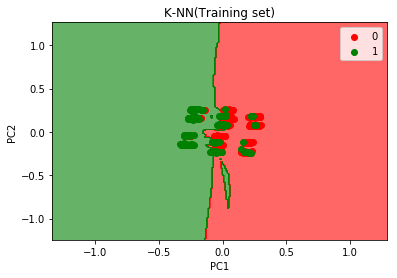

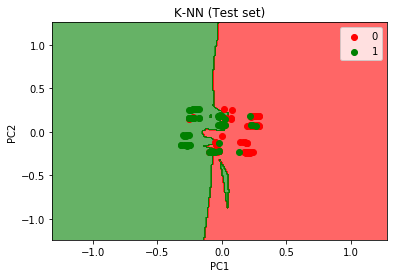

In [22]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()




In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [23]:
cm


array([[67,  6],
       [ 8, 57]])

In [24]:
print("Accuracy in the test:",(67+49)/(67+49+16+6))

Accuracy in the test: 0.8405797101449275


## Naive Bayes Classification

### In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.



![](https://image.slidesharecdn.com/accap7nb-110428075620-phpapp01/95/lesson-71-naive-bayes-classifier-7-638.jpg?cb=1404992657)

![](http://learning.cis.upenn.edu/cis520_fall2009/uploads/Lectures/2class_gauss_NB.jpg)

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)


In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)


In [ ]:
accuracies.mean()

In [ ]:
accuracies.std()

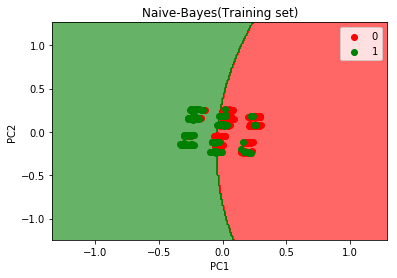

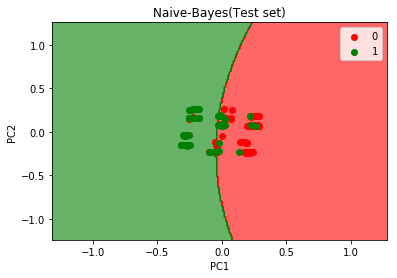

In [26]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive-Bayes(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()




In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive-Bayes(Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [27]:
cm


array([[67,  6],
       [17, 48]])

In [28]:
print("Accuracy in the test:",(65+54)/(65+54+11+8))

Accuracy in the test: 0.8623188405797102


## Decision Tree Classification

		
### Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). Leaf node (e.g., Play) represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

![](http://scikit-learn.org/stable/_images/iris.svg)

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_0011.png)

### Decision Tree Classifier, repetitively divides the working area(plot) into sub part by identifying lines. (repetitively because there may be two distant regions of same class divided by other as shown in image below).
## Entropy
### Entropy is degree of randomness of elements or in other words it is measure of impurity. Mathematically, it can be calculated with the help of probability of the items as:    It is negative summation of probability times the log of probability of item x.



### Dividing efficiently based on maximum information gain is key to decision tree classifier. However, in real world with millions of data dividing into pure class in practically not feasible (it may take longer training time) and so we stop at points in nodes of tree when fulfilled with certain parameters (for example impurity percentage). 

![](https://cdn-images-1.medium.com/max/800/1*1CchuZc1nLM3B60zS7A1yw.png)

In [29]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

In [ ]:
accuracies.mean()

In [ ]:
accuracies.std()

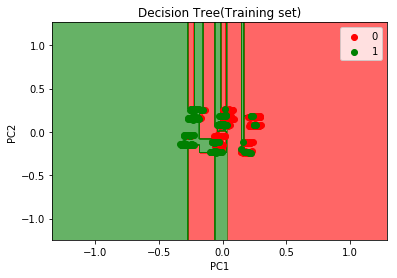

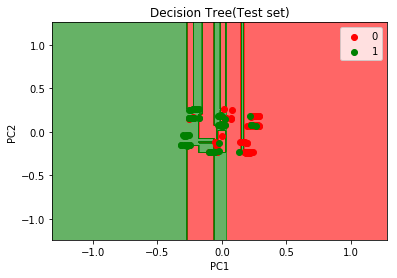

In [30]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()




In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree(Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [31]:
cm

array([[61, 12],
       [19, 46]])

In [32]:
print("Accuracy in the test:",(65+43)/(65+43+22+8))

Accuracy in the test: 0.782608695652174


## [Link to a good Decision Tree Tutorial](https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567)

## Random Forest Classification

### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. 

In [33]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [5,7, 10, 15, 17,19,25,30,35,40,45]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
accuracies.mean()



In [ ]:
accuracies.std()

In [ ]:
best_accuracy

In [ ]:
best_parameters

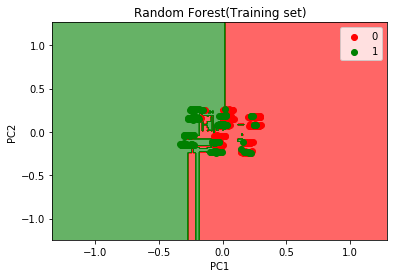

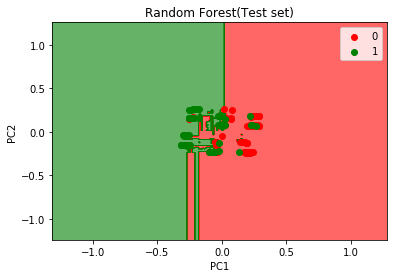

In [34]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()




In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest(Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [35]:
cm

array([[65,  8],
       [16, 49]])

In [36]:
print("Accuracy in the test:",(65+49)/(65+49+16+8))

Accuracy in the test: 0.8260869565217391


## Support Vector Machine Classification

#### In machine learning, support vector machines (SVMs, also support vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.



![](http://dni-institute.in/blogs/wp-content/uploads/2015/09/SVM-Planes.png)

#### <u> Margin</u>
#### And finally last but very importrant characteristic of SVM classifier. SVM to core tries to achieve a good margin.

#### A margin is a separation of line to the closest class points.

#### A good margin is one where this separation is larger for both the classes. Images below gives to visual example of good and bad margin. A good margin allows the points to be in their respective classes without crossing to other class.

![](https://cdn-images-1.medium.com/max/800/1*NbGV1iEtNuklACNUv74w7A.png)

![](https://cdn-images-1.medium.com/max/800/1*Ftns0ebfUHJDdpWt3Wvp-Q.png)

In [37]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)


In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [ ]:
accuracies.mean()



In [ ]:
accuracies.std()

In [ ]:
best_accuracy

In [ ]:
best_parameters 


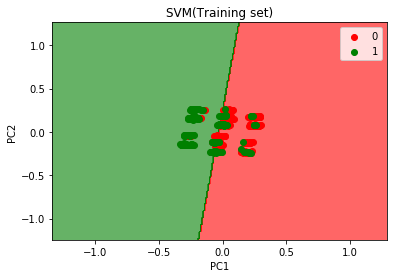

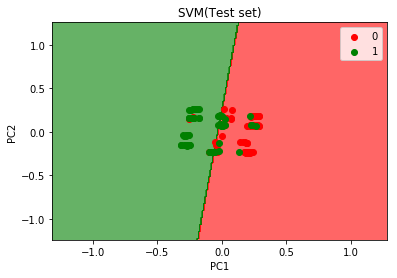

In [38]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()




In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM(Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [39]:
cm

array([[67,  6],
       [14, 51]])

In [40]:
print("Accuracy in the test:",(67+51)/(67+51+14+6))

Accuracy in the test: 0.855072463768116


##  Extreme Gradient Boosting-XGBoost Classification 

### Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.
### Gradient boosting is typically used with decision trees (especially CART trees) of a fixed size as base learners. For this special case Friedman proposes a modification to gradient boosting method which improves the quality of fit of each base learner.
### Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

## Why Use XGBoost?
The two reasons to use XGBoost are also the two goals of the project:

### Execution Speed.
### Model Performance.


### XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems.

### The evidence is that it is the go-to algorithm for competition winners on the Kaggle competitive data science platform.

## [Link to a free 7 day tutorial with XGBoost](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

## [XGBoost R Installation](https://cran.r-project.org/web/packages/xgboost/vignettes/xgboostPresentation.html)

## [Python XGBoost Implementation](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

In [41]:
!pip install xgboost

    100% |################################| 460kB 299kB/s ta 0:00:011
^C
Operation cancelled by user


In [42]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)


In [ ]:
accuracies.mean()


In [ ]:
accuracies.std()

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Xgboost(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.60, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Xgboost(Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
cm

In [ ]:
print("Accuracy in test ",(66+52)/(66+52+7+13)*100)

## Deep Learning-Neural Nets

## Artificial Neural Networks(ANN)

In [43]:
!pip install tensorflow

In [44]:
!pip install keras

![](http://www.scielo.br/img/revistas/pope/v35n1//0101-7438-pope-35-01-00073-gf1.jpg)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png)

![](http://www.valuewalk.com/wp-content/uploads/2016/06/deep-neural-networks-1.jpg)

# [Yann Lecun-Efficient BackProp ,1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

# [Neural Networks and Deep Learning,Michael-Nielsen,2015](http://neuralnetworksanddeeplearning.com/chap2.html)

![](https://image.slidesharecdn.com/2012-1158-160208231021/95/backpropagation-in-neural-networks-7-638.jpg?cb=1454973113)

# [Keras API](https://keras.io/)

## The Vanishing Gradient Problem

### The vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the gradient of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

#### The are some problems with this approach. Adjusting all the weights at once can result in a significant movement of the neural network in weight space, the gradient descent algorithm is quite slow, and is susceptible to local minima. Local minima are a problem for specific types of neural networks including all product link neural networks. The first two problems can be addressed by using variants of gradient descent including momentum gradient descent (QuickProp), Nesterov's Accelerated Momentum (NAG) gradient descent, the Adaptive Gradient Algorithm (AdaGrad), Resilient Propagation (RProp), and Root Mean Squared Propagation (RMSProp). As can be seen from the image below significant improvements can be made on the classical gradient descent algorithm. 

## Visualizing Optimization Algos

![](http://www.turingfinance.com/wp-content/uploads/2014/05/Long-Valley-Training-Algorithms.gif)

#### Algos without scaling based on gradient information really struggle to break symmetry here - SGD gets no where and Nesterov Accelerated Gradient / Momentum exhibits oscillations until they build up velocity in the optimization direction.

#### Algos that scale step size based on the gradient quickly break symmetry and begin descent.)

![](https://i.imgur.com/pD0hWu5.gif?1)

## Saddle Point
#### Behavior around a saddle point.

#### NAG/Momentum again like to explore around, almost taking a different path. 

#### Adadelta/Adagrad/RMSProp proceed like accelerated SGD. 

![](https://i.imgur.com/NKsFHJb.gif?1)

## <u> Activation Functions </u>

#### Why we use Activation functions with Neural Networks?

#### It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).


![](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)

### Sigmoid Function

#### The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.



### Derivative of the sigmoid function

![](https://cdn-images-1.medium.com/max/800/1*RWfQHtE8DUU9MiEue6nTYQ.png)

![](https://cdn-images-1.medium.com/max/1000/1*GOjCYjqPb5oMcfs0ZT8TQQ.png)

### The maximum point of the function is 1/4, and the function horizontally asymptotes at 0. In other words, the output of the derivative of the cost function is always between 0 and 1/4. In mathematical terms, the range is (0, 1/4].

#### Each neuron or “activity” is derived from the previous: it is the previous activity multiplied by some weight and then fed through an activation function. The input, of course, is the notable exception. The error box J at the end returns the aggregate error of our system. We then perform backpropagation to modify the weights through gradient descent such that the output of J is minimized.

#### To calculate the derivative to the first weight, we used the chain rule to “backpropagate” like so:

![](https://cdn-images-1.medium.com/max/800/0*d5zULA4KVEsVYlng.)

![](https://cdn-images-1.medium.com/max/800/1*c9gelH3uoC54l9h4NeVrBA.png)

![](https://cdn-images-1.medium.com/max/800/1*VDUbtzZ03InBSSINfS-q8A.png)

![](https://cdn-images-1.medium.com/max/800/1*zejGoPP4Q1C170WsW7K_-w.png)

#### Recall that the derivative of the sigmoid function outputs values between 0 and 1/4. By multiplying these two derivatives together, we are multiplying two values in the range (0, 1/4]. Any two numbers between 0 and 1 multiplied with each other will simply result in a smaller value. For example, 1/3 × 1/3 is 1/9

![](https://cdn-images-1.medium.com/max/800/1*8JJ6sYleUtvUZR7TOyyFVg.png)

![](https://cdn-images-1.medium.com/max/800/1*ovM3Kqss3wbO2Nxj5yzRmw.png)

### As you can see, the first layer is the furthest back from the error, so the derivative (using the chain rule) will be a longer expression and hence will contain more sigmoid derivatives, ending up smaller. Because of this, the first layers are the slowest to train. But there’s another issue with this: since the latter layers (and most notably the output) is functionally dependent on the earlier layers, inaccurate early layers will cause the latter layers to simply build on this inaccuracy, corrupting the entire neural net. 

### Well, it’s pretty clear that the root cause of the problem is the nature of the sigmoid activation function derivative. This also happened in the most popular alternative, the tanh function. Until recently, not many other activation functions were thought of / used. But now, the sigmoid and tanh functions have been declining in popularity in the light of the ReLU activation function.

### Relu Function

![](https://cdn-images-1.medium.com/max/800/1*ZD5kma5J-6UabfEwERv_dQ.png)

![](https://cdn-images-1.medium.com/max/800/1*I3m4X5zMlOhhK8W3j3Pvkw.png)

## Derivative Function

![](https://cdn-images-1.medium.com/max/800/1*-1esz_gtjhs2JTmSh4xAUg.png)

####  When the input is smaller than zero, the output is always equal to zero, and so the rate of change of the function is zero. When the input is greater or equal to zero, the output is simply the input, and hence the derivative is equal to one

![](https://cdn-images-1.medium.com/max/1600/1*cIsyfhOzTjQrfhUiimxn8g.png)

## Leaky Relu function is actually used !

![](https://cdn-images-1.medium.com/max/800/1*tqN5Q_DqdFgsPP6NpRPbfA.png)

### ReLUs still face the vanishing gradient problem, it’s just that they often face it to a lesser degree

###  ANN with the PCA Input

In [ ]:
# Artificial Neural Network



# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
# classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 150)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("cm is:",cm)




In [ ]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()

# Improving the ANN
# Dropout Regularization to reduce overfitting if needed

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 300],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

### ANN with the Original INPUT

In [45]:
dataset=pd.read_csv("Credit_Card_Applications.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [46]:
X.shape

(690, 15)

In [ ]:
# Artificial Neural Network



# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
# classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 150)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("cm is:",cm)




In [ ]:
print("Accuracy",(65+55)/(65+55+8+10))

In [ ]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()

# Improving the ANN
# Dropout Regularization to reduce overfitting if needed

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 300],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

### Conclusion about Classification-Clustering Methods

# From Unsupervised to Supervised Deep Learning-Fraud Detetction System

## Unsupervised Deep Learning-Self Organizing Maps(SOMs)

### A self-organizing map (SOM) or self-organizing feature map (SOFM) is a type of artificial neural network (ANN) that is trained using unsupervised learning to produce a low-dimensional (typically two-dimensional), discretized representation of the input space of the training samples, called a map, and is therefore a method to do dimensionality reduction. Self-organizing maps differ from other artificial neural networks as they apply competitive learning as opposed to error-correction learning (such as backpropagation with gradient descent), and in the sense that they use a neighborhood function to preserve the topological properties of the input space.

![](https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/Architecture/images/kohonen.jpg)

![](https://upload.wikimedia.org/wikipedia/commons/7/70/Synapse_Self-Organizing_Map.png)

### A self-organizing map showing U.S. Congress voting patterns. The input data was a table with a row for each member of Congress, and columns for certain votes containing each member's yes/no/abstain vote. The SOM algorithm arranged these members in a two-dimensional grid placing similar members closer together. The first plot shows the grouping when the data are split into two clusters. The second plot shows average distance to neighbours: larger distances are darker. The third plot predicts Republican (red) or Democratic (blue) party membership. The other plots each overlay the resulting map with predicted values on an input dimension: red means a predicted 'yes' vote on that bill, blue means a 'no' vote. 

## Learning

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Somtraining.svg/1000px-Somtraining.svg.png)

### Training process
##### The training process is very important, because the untrained network has no idea why it exists. The more training passes are applied the greater the effect of the training. And after that the weights of the neurons can bring out many important properties of the data. For example, how the data can be generalized, how the data might be represented, what clusters (groups) exist in the data and so on.

#### There are two training algorithms for the Kohonen network. As we said in the beginning, the first is called Winner Takes All (WTA), and the second is Winner Takes Most (WTM).

#### WTA is very easy to understand and implement. When data is placed on the input to the neural network all the outputs are compared and the neuron with the highest response is chosen. This means that the weights of the winning neuron are quite close to the data. The winning neuron is the neuron with the highest response for the given input value. The weights for this neuron only are modified:

### w(t+1) = w(t) + C(t) ( x - w(t) )

#### where: w(t) is the weight(s) after training pass t, w(t+1) is the modified weight(s), x is the input data, and C is a training coefficient which may vary as the training process proceeds.

#### Generally the behaviour of the WTA training algorithm is that it invests only in winners. Very radical method, isn't it? The WTM training process is more complicated. As in WTA we look for the best neuron, but we train all neurons in neighbourhood.

### wM(t+1) = wM(t) + G( w(t), x, N, M, t )( x - wM(t) )

#### where: w(t) is the existing weight(s) of the trained neuron (not only the winner), w(t+1) is the modified weight(s) of this neuron, x is the input data, and G is a training function, N is neuron which is mostly activated (the winner), M denotes trained neuron.

#### Function G depends on the relation between the winning neuron N and the trained neuron M, also between the weight wM and the data x. The library provides some ready-made WTM algorithms, too. The WTM algorithm trains groups of neurons, as much as they fit to the data.

![](https://accu.org/content/images/journals/ol74/KohonenNeuralNetworkLibraryFigure3.png)

#### In sum, learning occurs in several steps and over many iterations. : 
#### 1.Each node's weights are initialized.
#### 2.A vector is chosen at random from the set of training data.
#### 3.Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
#### 4.Then the neighbourhood of the BMU is calculated. The amount of neighbors decreases over time.
#### 5.The winning weight is rewarded with becoming more like the sample vector. The nighbors also become more like the sample vector. The closer a node is to the BMU, the more its weights get altered and the farther away the neighbor is from the BMU, the less it learns.
#### 6.Repeat step 2 for N iterations.


![](https://i.makeagif.com/media/4-28-2015/F4XE54.gif)

# [The self-organizing map,Tuevo Kohonen, 1990](http://sci2s.ugr.es/keel/pdf/algorithm/articulo/1990-Kohonen-PIEEE.pdf)

## Major Difference between SOMs and other Neural Networks:In self-organizing Maps there is not activation function,weights are the characteristic of the nodes!

In [47]:
from math import sqrt

from numpy import (array, unravel_index, nditer, linalg, random, subtract,
                   power, exp, pi, zeros, arange, outer, meshgrid, dot)
from collections import defaultdict
from warnings import warn


"""
    Minimalistic implementation of the Self Organizing Maps (SOM).
"""


def fast_norm(x):
    """Returns norm-2 of a 1-D numpy array.

    * faster than linalg.norm in case of 1-D arrays (numpy 1.9.2rc1).
    """
    return sqrt(dot(x, x.T))


class MiniSom(object):
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=None, random_seed=None):
        """
            Initializes a Self Organizing Maps.
            x,y - dimensions of the SOM
            input_len - number of the elements of the vectors in input
            sigma - spread of the neighborhood function (Gaussian), needs to be adequate to the dimensions of the map.
            (at the iteration t we have sigma(t) = sigma / (1 + t/T) where T is #num_iteration/2)
            learning_rate - initial learning rate
            (at the iteration t we have learning_rate(t) = learning_rate / (1 + t/T) where T is #num_iteration/2)
            decay_function, function that reduces learning_rate and sigma at each iteration
                            default function: lambda x,current_iteration,max_iter: x/(1+current_iteration/max_iter)
            random_seed, random seed to use.
        """
        if sigma >= x/2.0 or sigma >= y/2.0:
            warn('Warning: sigma is too high for the dimension of the map.')
        if random_seed:
            self.random_generator = random.RandomState(random_seed)
        else:
            self.random_generator = random.RandomState(random_seed)
        if decay_function:
            self._decay_function = decay_function
        else:
            self._decay_function = lambda x, t, max_iter: x/(1+t/max_iter)
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.weights = self.random_generator.rand(x,y,input_len)*2-1 # random initialization
        for i in range(x):
            for j in range(y):
                self.weights[i,j] = self.weights[i,j] / fast_norm(self.weights[i,j]) # normalization
        self.activation_map = zeros((x,y))
        self.neigx = arange(x)
        self.neigy = arange(y) # used to evaluate the neighborhood function
        self.neighborhood = self.gaussian

    def _activate(self, x):
        """ Updates matrix activation_map, in this matrix the element i,j is the response of the neuron i,j to x """
        s = subtract(x, self.weights) # x - w
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.activation_map[it.multi_index] = fast_norm(s[it.multi_index])  # || x - w ||
            it.iternext()

    def activate(self, x):
        """ Returns the activation map to x """
        self._activate(x)
        return self.activation_map

    def gaussian(self, c, sigma):
        """ Returns a Gaussian centered in c """
        d = 2*pi*sigma*sigma
        ax = exp(-power(self.neigx-c[0], 2)/d)
        ay = exp(-power(self.neigy-c[1], 2)/d)
        return outer(ax, ay)  # the external product gives a matrix

    def diff_gaussian(self, c, sigma):
        """ Mexican hat centered in c (unused) """
        xx, yy = meshgrid(self.neigx, self.neigy)
        p = power(xx-c[0], 2) + power(yy-c[1], 2)
        d = 2*pi*sigma*sigma
        return exp(-p/d)*(1-2/d*p)

    def winner(self, x):
        """ Computes the coordinates of the winning neuron for the sample x """
        self._activate(x)
        return unravel_index(self.activation_map.argmin(), self.activation_map.shape)

    def update(self, x, win, t):
        """
            Updates the weights of the neurons.
            x - current pattern to learn
            win - position of the winning neuron for x (array or tuple).
            t - iteration index
        """
        eta = self._decay_function(self.learning_rate, t, self.T)
        sig = self._decay_function(self.sigma, t, self.T) # sigma and learning rate decrease with the same rule
        g = self.neighborhood(win, sig)*eta # improves the performances
        it = nditer(g, flags=['multi_index'])
        while not it.finished:
            # eta * neighborhood_function * (x-w)
            self.weights[it.multi_index] += g[it.multi_index]*(x-self.weights[it.multi_index])
            # normalization
            self.weights[it.multi_index] = self.weights[it.multi_index] / fast_norm(self.weights[it.multi_index])
            it.iternext()

    def quantization(self, data):
        """ Assigns a code book (weights vector of the winning neuron) to each sample in data. """
        q = zeros(data.shape)
        for i, x in enumerate(data):
            q[i] = self.weights[self.winner(x)]
        return q

    def random_weights_init(self, data):
        """ Initializes the weights of the SOM picking random samples from data """
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.weights[it.multi_index] = data[self.random_generator.randint(len(data))]
            self.weights[it.multi_index] = self.weights[it.multi_index]/fast_norm(self.weights[it.multi_index])
            it.iternext()

    def train_random(self, data, num_iteration):
        """ Trains the SOM picking samples at random from data """
        self._init_T(num_iteration)
        for iteration in range(num_iteration):
            rand_i = self.random_generator.randint(len(data)) # pick a random sample
            self.update(data[rand_i], self.winner(data[rand_i]), iteration)

    def train_batch(self, data, num_iteration):
        """ Trains using all the vectors in data sequentially """
        self._init_T(len(data)*num_iteration)
        iteration = 0
        while iteration < num_iteration:
            idx = iteration % (len(data)-1)
            self.update(data[idx], self.winner(data[idx]), iteration)
            iteration += 1

    def _init_T(self, num_iteration):
        """ Initializes the parameter T needed to adjust the learning rate """
        self.T = num_iteration/2  # keeps the learning rate nearly constant for the last half of the iterations

    def distance_map(self):
        """ Returns the distance map of the weights.
            Each cell is the normalised sum of the distances between a neuron and its neighbours.
        """
        um = zeros((self.weights.shape[0], self.weights.shape[1]))
        it = nditer(um, flags=['multi_index'])
        while not it.finished:
            for ii in range(it.multi_index[0]-1, it.multi_index[0]+2):
                for jj in range(it.multi_index[1]-1, it.multi_index[1]+2):
                    if ii >= 0 and ii < self.weights.shape[0] and jj >= 0 and jj < self.weights.shape[1]:
                        um[it.multi_index] += fast_norm(self.weights[ii, jj, :]-self.weights[it.multi_index])
            it.iternext()
        um = um/um.max()
        return um

    def activation_response(self, data):
        """
            Returns a matrix where the element i,j is the number of times
            that the neuron i,j have been winner.
        """
        a = zeros((self.weights.shape[0], self.weights.shape[1]))
        for x in data:
            a[self.winner(x)] += 1
        return a

    def quantization_error(self, data):
        """
            Returns the quantization error computed as the average distance between
            each input sample and its best matching unit.
        """
        error = 0
        for x in data:
            error += fast_norm(x-self.weights[self.winner(x)])
        return error/len(data)

    def win_map(self, data):
        """
            Returns a dictionary wm where wm[(i,j)] is a list with all the patterns
            that have been mapped in the position i,j.
        """
        winmap = defaultdict(list)
        for x in data:
            winmap[self.winner(x)].append(x)
        return winmap

### unit tests
from numpy.testing import assert_almost_equal, assert_array_almost_equal, assert_array_equal


class TestMinisom:
    def setup_method(self, method):
        self.som = MiniSom(5, 5, 1)
        for i in range(5):
            for j in range(5):
                assert_almost_equal(1.0, linalg.norm(self.som.weights[i,j]))  # checking weights normalization
        self.som.weights = zeros((5, 5))  # fake weights
        self.som.weights[2, 3] = 5.0
        self.som.weights[1, 1] = 2.0

    def test_decay_function(self):
        assert self.som._decay_function(1., 2., 3.) == 1./(1.+2./3.)

    def test_fast_norm(self):
        assert fast_norm(array([1, 3])) == sqrt(1+9)

    def test_gaussian(self):
        bell = self.som.gaussian((2, 2), 1)
        assert bell.max() == 1.0
        assert bell.argmax() == 12  # unravel(12) = (2,2)

    def test_win_map(self):
        winners = self.som.win_map([5.0, 2.0])
        assert winners[(2, 3)][0] == 5.0
        assert winners[(1, 1)][0] == 2.0

    def test_activation_reponse(self):
        response = self.som.activation_response([5.0, 2.0])
        assert response[2, 3] == 1
        assert response[1, 1] == 1

    def test_activate(self):
        assert self.som.activate(5.0).argmin() == 13.0  # unravel(13) = (2,3)

    def test_quantization_error(self):
        self.som.quantization_error([5, 2]) == 0.0
        self.som.quantization_error([4, 1]) == 0.5

    def test_quantization(self):
        q = self.som.quantization(array([4, 2]))
        assert q[0] == 5.0
        assert q[1] == 2.0

    def test_random_seed(self):
        som1 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som2 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        assert_array_almost_equal(som1.weights, som2.weights)  # same initialization
        data = random.rand(100,2)
        som1 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som1.train_random(data,10)
        som2 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som2.train_random(data,10)
        assert_array_almost_equal(som1.weights,som2.weights)  # same state after training

    def test_train_batch(self):
        som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        data = array([[4, 2], [3, 1]])
        q1 = som.quantization_error(data)
        som.train_batch(data, 10)
        assert q1 > som.quantization_error(data)

    def test_train_random(self):
        som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        data = array([[4, 2], [3, 1]])
        q1 = som.quantization_error(data)
        som.train_random(data, 10)
        assert q1 > som.quantization_error(data)

    def test_random_weights_init(self):
        som = MiniSom(2, 2, 2, random_seed=1)
        som.random_weights_init(array([[1.0, .0]]))
        for w in som.weights:
            assert_array_equal(w[0], array([1.0, .0]))




### Above code was taken from the web

## [Author: Giuseppe Vettigli](https://testpypi.python.org/pypi/MiniSom/1.0)

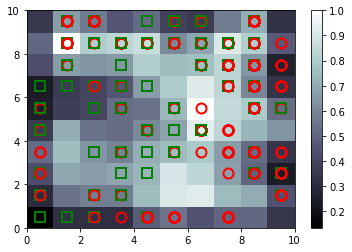

In [58]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)


som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate([mappings[(5,3)], mappings[(8,3)]], axis = 0)
frauds = sc.inverse_transform(frauds)





In [55]:
customers = dataset.iloc[:, 1:].values

# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)


from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]


Using TensorFlow backend.
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Epoch 1/2
690/690 [==============================] - 7s - loss: 0.4604 - acc: 0.9739     
Epoch 2/2
690/690 [==============================] - 7s - loss: 0.1460 - acc: 0.9754     


In [56]:
y_pred

array([[  1.57238270e+07,   9.52574704e-03],
       [  1.56992940e+07,   1.01175290e-02],
       [  1.57162760e+07,   1.03409700e-02],
       ..., 
       [  1.55988020e+07,   3.17856342e-01],
       [  1.57627160e+07,   3.37723732e-01],
       [  1.57901130e+07,   3.37723732e-01]])

In [57]:
print(y_pred)

[[  1.57238270e+07   9.52574704e-03]
 [  1.56992940e+07   1.01175290e-02]
 [  1.57162760e+07   1.03409700e-02]
 ..., 
 [  1.55988020e+07   3.17856342e-01]
 [  1.57627160e+07   3.37723732e-01]
 [  1.57901130e+07   3.37723732e-01]]
